## Chapter 8 - Dimensionality Reduction

### Question 9 - comparing random forest classifier before and after PCA on Mnist dataset

loading Mnist and spliting to training and test sets

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784' , version=1)
X , y = mnist["data"] , mnist["target"]

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=60000 , random_state=42)

fitting RF classifier, timing it and evaluating it

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

rf_clf = RandomForestClassifier(n_estimators=50,random_state=42)

start = time.time()
rf_clf.fit(X_train , y_train)
end = time.time()

y_pred = rf_clf.predict(X_test)

print(f"Training time: {end - start}s")
print(accuracy_score(y_test,y_pred))

Training time: 16.36022114753723s
0.9655


performing PCA with explained variance ratio of 95%, which reduce the training size to 154 from 784

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95 , random_state=42)

x_new = pca.fit_transform(X_train)
x_new.shape

(60000, 154)

fitting Rf classifier on the new dataset, which amazingly takes double time than the normal training set and we lossing a little accuracy on the test set

In [6]:
rf_clf_pca = RandomForestClassifier(n_estimators=50,random_state=42)

start2 = time.time()
rf_clf_pca.fit(x_new , y_train)
end2 = time.time()
print(f"Training time: {end2 - start2}s")

Training time: 33.98112678527832s


In [9]:
x_test_new = pca.transform(X_test)
y_pred_pca = rf_clf_pca.predict(x_test_new)
print(accuracy_score(y_test,y_pred_pca))

0.9424


### Question 10 - Visualising with  t-SNE

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=42)

x_new_tsne = tsne.fit_transform(X_train)

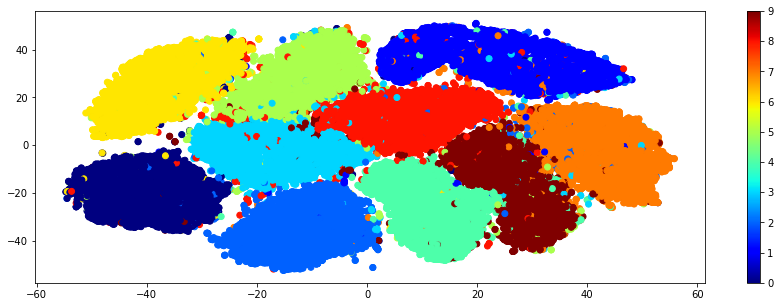

In [110]:
plt.figure(figsize=(15,5))
plt.scatter(x_new_tsne[:,0] , x_new_tsne[:,1] ,c = y_train.astype(int) , cmap='jet')
plt.colorbar()
plt.show()